In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [40]:
icouk_data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
icop_data_file = '..\\Data\\icop_ahmed_2020_sighting_data_with_params.csv'
alrefay_data_file = '..\\Data\\alrefay_2018_sighting_data_with_params.csv'
allawi_data_file = '..\\Data\\schaefer_odeh_allawi_2022_sighting_data_with_params.csv'

icouk_data = pd.read_csv(icouk_data_file)
icop_data = pd.read_csv(icop_data_file)
alrefay_data = pd.read_csv(alrefay_data_file)
allawi_data = pd.read_csv(allawi_data_file)

data = pd.concat([icouk_data,icop_data,alrefay_data,allawi_data])

print(data.shape[0])
#data = data[data["Cloud Level"] == 0]

3626


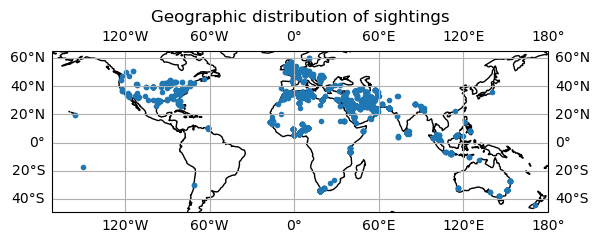

In [36]:
x = data["Longitude"]
y= data["Latitude"]
#plt.plot(x,y,".")
crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.plot(x,y,".")
ax.set_title("Geographic distribution of sightings")
plt.show()

['Not_seen' 'Seen']


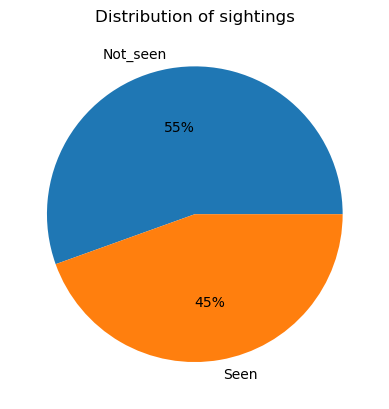

In [37]:
pies = data["Seen"].value_counts(sort=False)
labels = data["Seen"].unique()
print(labels)
plt.pie(pies, labels=labels, autopct='%1.0f%%')
plt.title('Distribution of sightings')
plt.show()

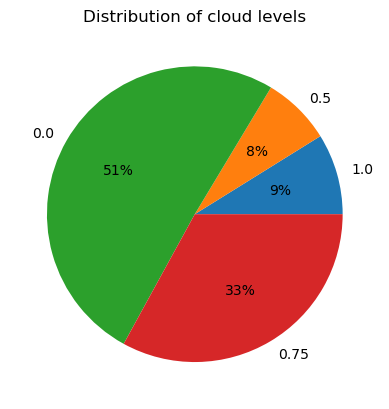

In [38]:
pies = data["Cloud Level"].value_counts(sort=False)
labels = data["Cloud Level"].unique()
plt.pie(pies, labels=labels, autopct='%1.0f%%')
plt.title('Distribution of cloud levels')
plt.show()

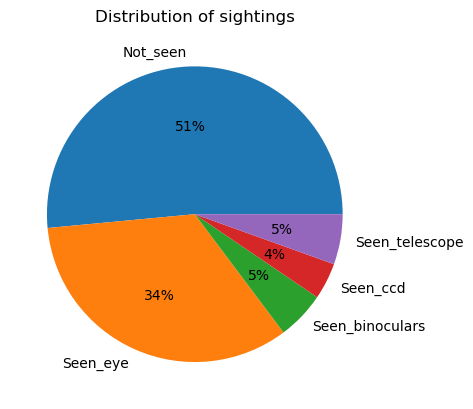

In [39]:
pies = data["Method"].value_counts(sort=False)
labels = data["Method"].unique()
plt.pie(pies, labels=labels, autopct='%1.0f%%')
plt.title('Distribution of sightings')
plt.show()